In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [138]:
print(os.listdir('summary'))
# summary = pd.read_csv('summary/model-mse-100-10-rrrl.csv')
# summary = pd.read_csv('~/Downloads/leakyrelu.csv')
summary = pd.read_csv('summary/model.csv')
summary

['model-mse-100-10-rrrl', 'model.csv', 'model-mse-100-10-rrrl.csv']


,epoch,train_loss,test_loss,x_train.min,x_train.max,x_train.mean,x_train.var,x_test.min,x_test.max,x_test.mean,...,z_train[7].mean,z_train[7].var,z_train[8].min,z_train[8].max,z_train[8].mean,z_train[8].var,z_train[9].min,z_train[9].max,z_train[9].mean,z_train[9].var
0,1,0.000462,0.000465,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000243,0.000253,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.000240,0.000251,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.000241,0.000251,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.000239,0.000249,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.000239,0.000249,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.000238,0.000248,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.000241,0.000250,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.000238,0.000248,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0.000237,0.000248,-2.80045,2.78271,0.004942,0.006924,-2.615,2.59069,0.004922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


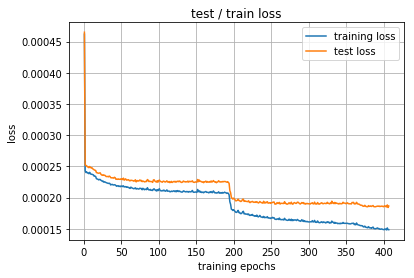

In [139]:
fig, ax = plt.subplots()
ax.plot(summary['epoch'], summary[' train_loss'], label='training loss')
ax.plot(summary['epoch'], summary[' test_loss'], label='test loss')
ax.set(xlabel='training epochs', ylabel='loss', title='test / train loss')
ax.legend()
ax.grid()

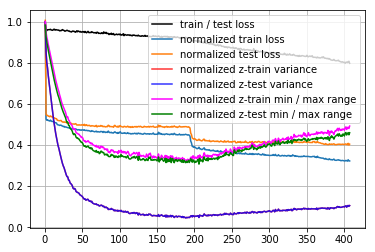

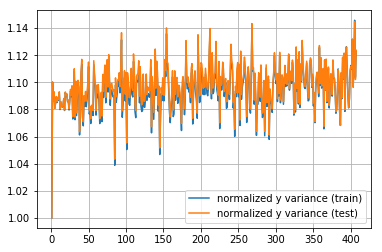

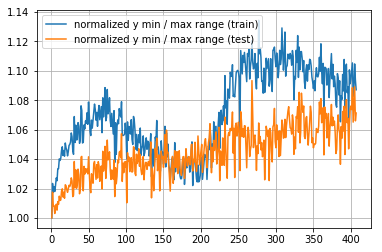

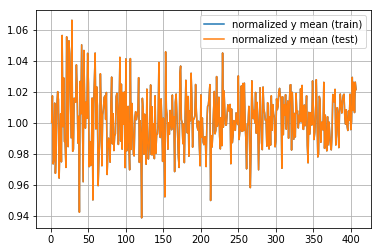

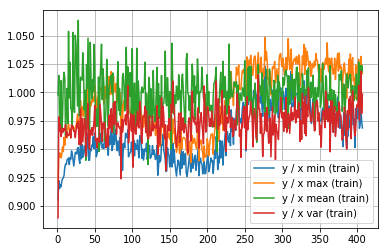

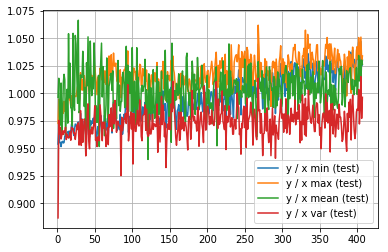

In [140]:
fig, ax = plt.subplots()
t0 = summary[' train_loss'][0]
z0 = summary[' z_train.var'][0]
zr0 = (summary[' z_train.max'] - summary[' z_train.min'])[0]
ax.plot(summary['epoch'], summary[' train_loss'] / summary[' test_loss'], label='train / test loss', alpha=1.0, color='black')
ax.plot(summary['epoch'], summary[' train_loss'] / t0, label='normalized train loss')
ax.plot(summary['epoch'], summary[' test_loss'] / t0, label='normalized test loss')
ax.plot(summary['epoch'], summary[' z_train.var'] / z0, label='normalized z-train variance', alpha=0.8, color='red')
ax.plot(summary['epoch'], summary[' z_train.var'] / z0, label='normalized z-test variance', alpha=0.8, color='blue')
ax.plot(summary['epoch'], (summary[' z_train.max'] - summary[' z_train.min']) / zr0, label='normalized z-train min / max range', alpha=1.0, color='magenta')
ax.plot(summary['epoch'], (summary[' z_test.max'] - summary[' z_test.min']) / zr0, label='normalized z-test min / max range', alpha=1.0, color='green')
ax.grid()
ax.legend()

fig, ax = plt.subplots()

ytrv = summary[' y_train.var']
ytev = summary[' y_test.var']

ytrr = summary[' y_train.max'] - summary[' y_train.min']
yter = summary[' y_test.max'] - summary[' y_test.min']

ytrm = summary[' y_train.mean']
ytem = summary[' y_train.mean']

ax.plot(summary['epoch'], ytrv / ytrv[0], label='normalized y variance (train)')
ax.plot(summary['epoch'], ytev / ytev[0], label='normalized y variance (test)')
ax.grid()
ax.legend()
fig, ax = plt.subplots()


ax.plot(summary['epoch'], ytrr / ytrr[0], label='normalized y min / max range (train)')
ax.plot(summary['epoch'], yter / yter[0], label='normalized y min / max range (test)')
ax.grid()
ax.legend()
fig, ax = plt.subplots()


ax.plot(summary['epoch'], ytrm / ytrm[0], label='normalized y mean (train)')
ax.plot(summary['epoch'], ytem / ytem[0], label='normalized y mean (test)')
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(summary['epoch'], summary[' y_train.min'] / summary[' x_train.min'], label='y / x min (train)')
ax.plot(summary['epoch'], summary[' y_train.max'] / summary[' x_train.max'], label='y / x max (train)')
ax.plot(summary['epoch'], summary[' y_train.mean'] / summary[' x_train.mean'], label='y / x mean (train)')
ax.plot(summary['epoch'], summary[' y_train.var'] / summary[' x_train.var'], label='y / x var (train)')
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(summary['epoch'], summary[' y_test.min'] / summary[' x_test.min'], label='y / x min (test)')
ax.plot(summary['epoch'], summary[' y_test.max'] / summary[' x_test.max'], label='y / x max (test)')
ax.plot(summary['epoch'], summary[' y_test.mean'] / summary[' x_test.mean'], label='y / x mean (test)')
ax.plot(summary['epoch'], summary[' y_test.var'] / summary[' x_test.var'], label='y / x var (test)')
ax.grid()
ax.legend()

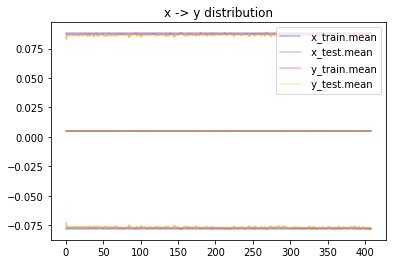

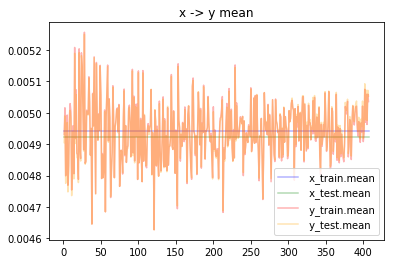

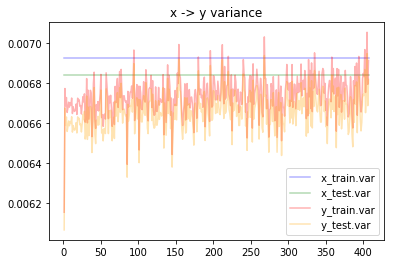

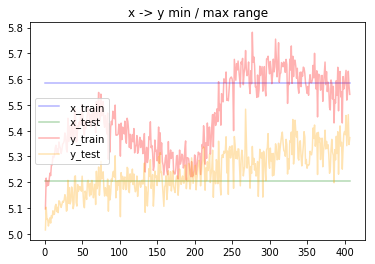

In [142]:

def plot_distribution (ax, value, color):
    label = value.strip()
    x, min_, max_, mean_, var_ = summary['epoch'], summary['%s.min'%value], summary['%s.max'%value], summary['%s.mean'%value], summary['%s.var'%value]
    stdev = var_ ** 0.5
#     ax.plot(x, min_, color=color, alpha=0.3)
#     ax.plot(x, max_, color=color, alpha=0.3)
    ax.plot(x, mean_, color=color, alpha=0.3)
    ax.plot(x, mean_ + stdev, color=color, alpha=0.3)
    ax.plot(x, mean_ - stdev, color=color, alpha=0.3)

def plot_means (ax, value, color):
    label = value.strip()
    x, min_, max_, mean_, var_ = summary['epoch'], summary['%s.min'%value], summary['%s.max'%value], summary['%s.mean'%value], summary['%s.var'%value]
    ax.plot(x, mean_, color=color, alpha=0.3)

def plot_vars (ax, value, color):
    label = value.strip()
    x, min_, max_, mean_, var_ = summary['epoch'], summary['%s.min'%value], summary['%s.max'%value], summary['%s.mean'%value], summary['%s.var'%value]
    ax.plot(x, var_, color=color, alpha=0.3)
    
def plot_range (ax, value, color):
    label = value.strip()
    x, min_, max_, mean_, var_ = summary['epoch'], summary['%s.min'%value], summary['%s.max'%value], summary['%s.mean'%value], summary['%s.var'%value]
    ax.plot(x, max_ - min_, label=value, color=color, alpha=0.3)

fig, ax = plt.subplots()
ax.set(title='x -> y distribution')
plot_distribution(ax, ' x_train', color='blue')
plot_distribution(ax, ' x_test', color='green')
plot_distribution(ax, ' y_train', color='red')
plot_distribution(ax, ' y_test', color='orange')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='x -> y mean')
plot_means(ax, ' x_train', color='blue')
plot_means(ax, ' x_test', color='green')
plot_means(ax, ' y_train', color='red')
plot_means(ax, ' y_test', color='orange')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='x -> y variance')
plot_vars(ax, ' x_train', color='blue')
plot_vars(ax, ' x_test', color='green')
plot_vars(ax, ' y_train', color='red')
plot_vars(ax, ' y_test', color='orange')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='x -> y min / max range')
plot_range(ax, ' x_train', color='blue')
plot_range(ax, ' x_test', color='green')
plot_range(ax, ' y_train', color='red')
plot_range(ax, ' y_test', color='orange')
ax.legend()

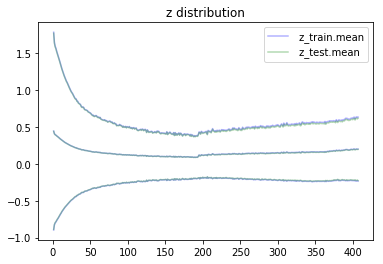

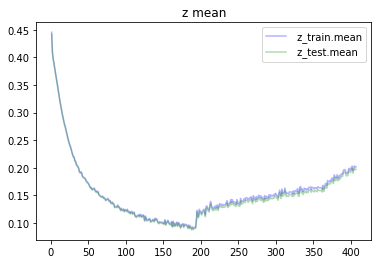

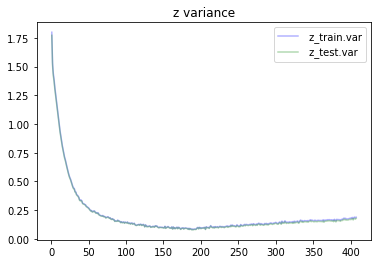

In [143]:
fig, ax = plt.subplots()
ax.set(title='z distribution')
plot_distribution(ax, ' z_train', color='blue')
plot_distribution(ax, ' z_test', color='green')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='z mean')
plot_means(ax, ' z_train', color='blue')
plot_means(ax, ' z_test', color='green')
ax.legend()

fig, ax = plt.subplots()
ax.set(title='z variance')
plot_vars(ax, ' z_train', color='blue')
plot_vars(ax, ' z_test', color='green')
ax.legend()

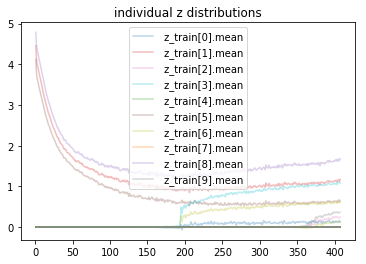

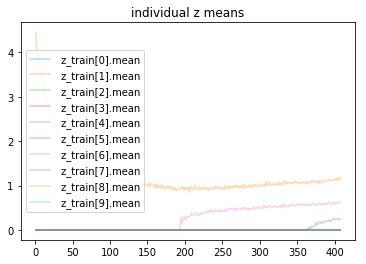

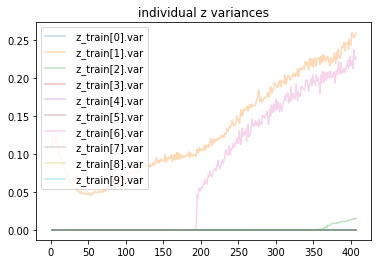

In [144]:
fig, ax = plt.subplots()
ax.set(title='individual z distributions')
for i in range(10):
    plot_distribution(ax, ' z_train[%s]'%i, color=None)
ax.legend()
    
fig, ax = plt.subplots()
ax.set(title='individual z means')
for i in range(10):
    plot_means(ax, ' z_train[%s]'%i, color=None)
ax.legend()

fig, ax = plt.subplots()
ax.set(title='individual z variances')
for i in range(10):
    plot_vars(ax, ' z_train[%s]'%i, color=None)
ax.legend()